In [1]:
import os
import warnings
warnings.filterwarnings("ignore")
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

%matplotlib inline
from pylab import rcParams
from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error

In [2]:
google = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/AnalyzeStocks/master/dataset/DJIA%2030%20Stock%20Time%20Series/GOOGL_2006-01-01_to_2018-01-01.csv")
, index_col='Date', parse_dates=['Date'])
google

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
1,2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2,2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
3,2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
4,2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL
...,...,...,...,...,...,...,...
3014,2017-12-22,1070.00,1071.72,1067.64,1068.86,889446,GOOGL
3015,2017-12-26,1068.64,1068.86,1058.64,1065.85,918767,GOOGL
3016,2017-12-27,1066.60,1068.27,1058.38,1060.20,1116203,GOOGL
3017,2017-12-28,1062.25,1064.84,1053.38,1055.95,994249,GOOGL


In [3]:
amazon = pd.read_csv('https://raw.githubusercontent.com/benvictoria17/AnalyzeStocks/master/dataset/DJIA%2030%20Stock%20Time%20Series/AMZN_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
amazon.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,47.47,47.85,46.25,47.58,7582127,AMZN
2006-01-04,47.48,47.73,46.69,47.25,7440914,AMZN
2006-01-05,47.16,48.20,47.11,47.65,5417258,AMZN
2006-01-06,47.97,48.58,47.32,47.87,6154285,AMZN
2006-01-09,46.55,47.10,46.40,47.08,8945056,AMZN


In [4]:
IBM = pd.read_csv('https://raw.githubusercontent.com/benvictoria17/AnalyzeStocks/master/dataset/DJIA%2030%20Stock%20Time%20Series/IBM_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
IBM.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


In [5]:
apple = pd.read_csv('https://raw.githubusercontent.com/benvictoria17/AnalyzeStocks/master/dataset/DJIA%2030%20Stock%20Time%20Series/AAPL_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
apple.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,10.34,10.68,10.32,10.68,201853036,AAPL
2006-01-04,10.73,10.85,10.64,10.71,155225609,AAPL
2006-01-05,10.69,10.70,10.54,10.63,112396081,AAPL
2006-01-06,10.75,10.96,10.65,10.90,176139334,AAPL
2006-01-09,10.96,11.03,10.82,10.86,168861224,AAPL


In [6]:
google.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

In [7]:
timestamp = pd.Timestamp(2017, 1, 1, 10)
timestamp

Timestamp('2017-01-01 10:00:00')

In [8]:
period = pd.Period('2017-01-01')
period

Period('2017-01-01', 'D')

In [9]:
period.start_time < timestamp < period.end_time

True

In [10]:
period1 = timestamp.to_period(freq='H')
period1

Period('2017-01-01 10:00', 'H')

In [11]:
timestamp1 = period.to_timestamp(freq='H', how='start')
timestamp1

Timestamp('2017-01-01 00:00:00')

In [12]:
dr1 = pd.date_range(start='1/1/18', end='30/12/18')
dr1

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2018-12-21', '2018-12-22', '2018-12-23', '2018-12-24',
               '2018-12-25', '2018-12-26', '2018-12-27', '2018-12-28',
               '2018-12-29', '2018-12-30'],
              dtype='datetime64[ns]', length=364, freq='D')

In [13]:
dr2 = pd.date_range(start='1/1/18', end='1/1/19', freq='M')
dr2

DatetimeIndex(['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31'],
              dtype='datetime64[ns]', freq='M')

In [14]:
dr3 = pd.date_range(end='1/4/2014', periods=12)
dr3

DatetimeIndex(['2013-12-24', '2013-12-25', '2013-12-26', '2013-12-27',
               '2013-12-28', '2013-12-29', '2013-12-30', '2013-12-31',
               '2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04'],
              dtype='datetime64[ns]', freq='D')

In [15]:
dr4 = pd.date_range(start='2013-04-24', end='2014-11-27', periods=3)
dr4

DatetimeIndex(['2013-04-24', '2014-02-09', '2014-11-27'], dtype='datetime64[ns]', freq=None)

In [16]:
df = pd.DataFrame({'year': [2020, 2021], 'month': [2, 3], 'day': [4, 5]})
df

,year,month,day
0,2020,2,4
1,2021,3,5


In [17]:
df = pd.to_datetime(df)
df

0   2020-02-04
1   2021-03-05
dtype: datetime64[ns]

In [18]:
google.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
1,2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2,2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
3,2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
4,2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL


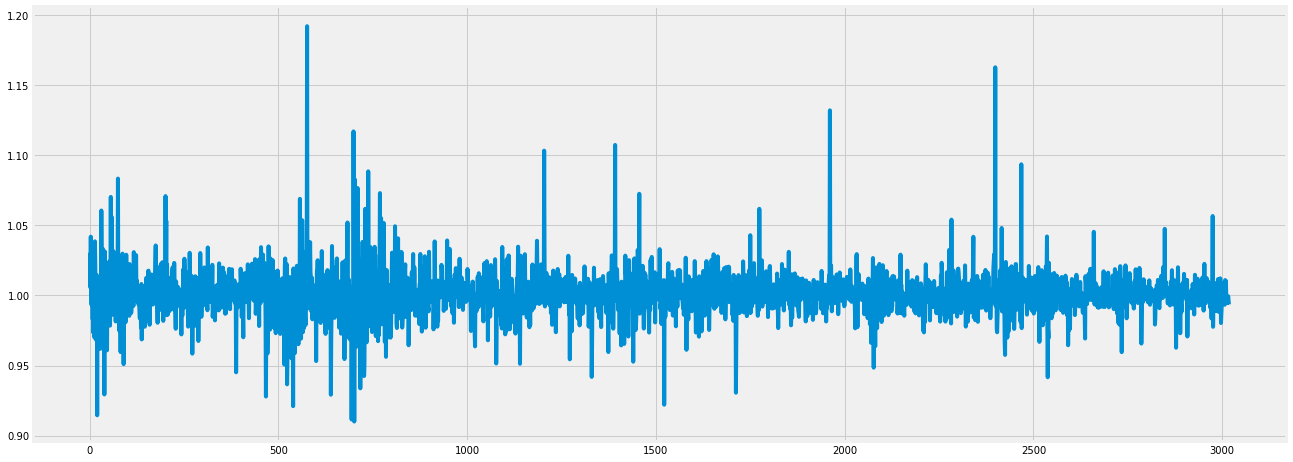

In [19]:
google['Change'] = google.High.div(google.High.shift())
google['Change'].plot(figsize=(20,8));

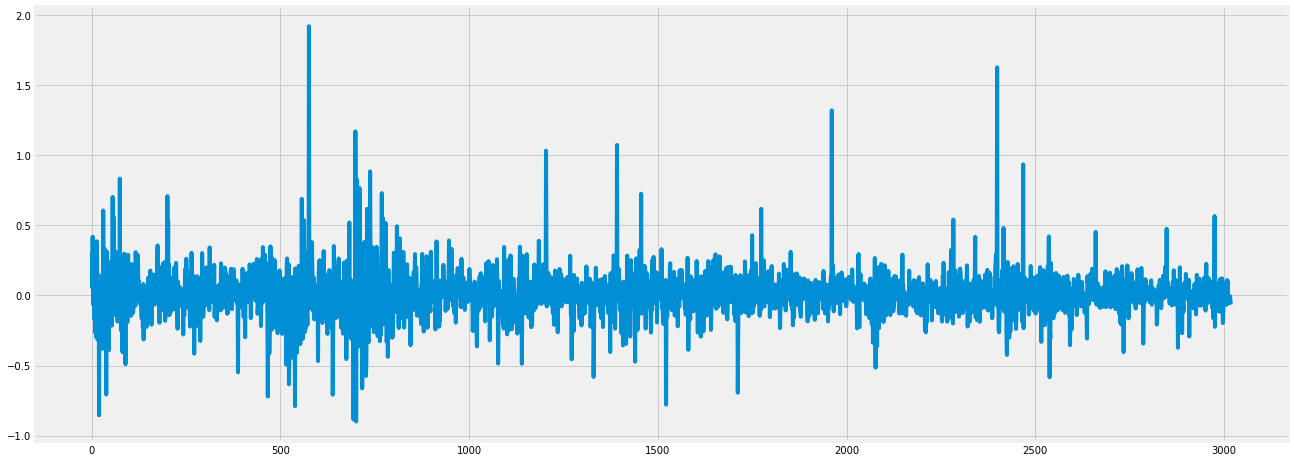

In [20]:
google['Return'] = google.Change.sub(1).mul(10)
google['Return'].plot(figsize=(20,8));

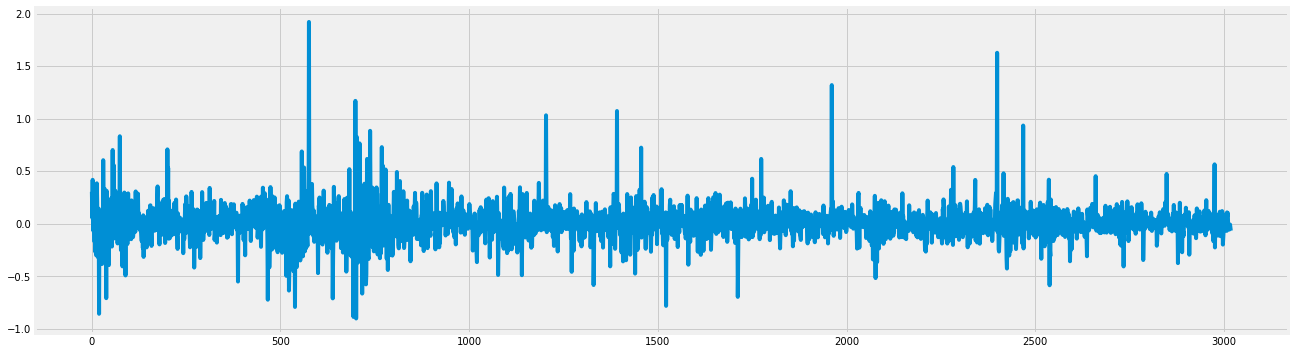

In [21]:
google.High.pct_change().mul(10).plot(figsize=(20,6)) ;

<AxesSubplot:>

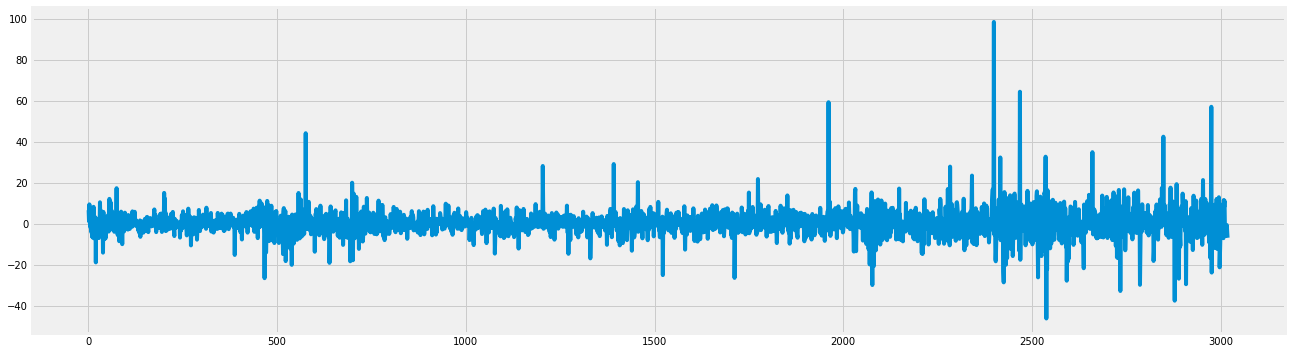

In [22]:
google.High.diff().plot(figsize=(20,6))

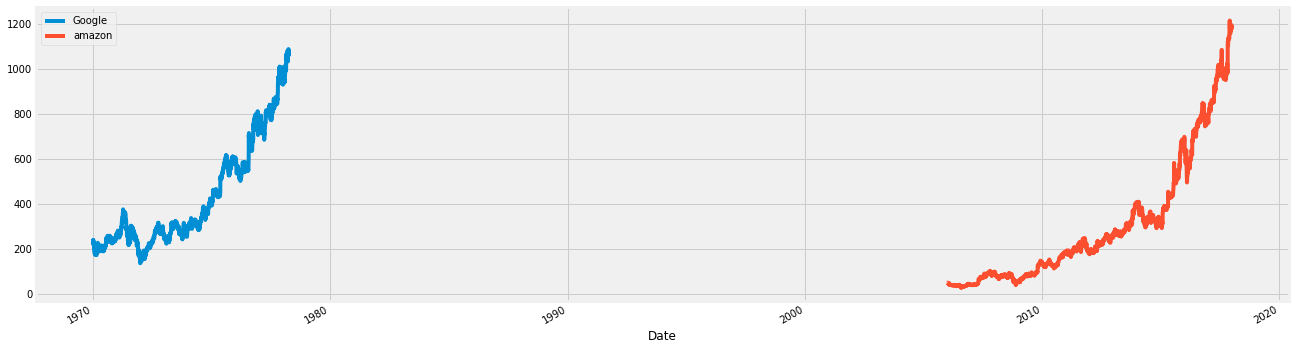

In [23]:
google.High.plot(figsize=(20,6))
amazon.High.plot(figsize=(20,6))
plt.legend(['Google','amazon'])
plt.show()

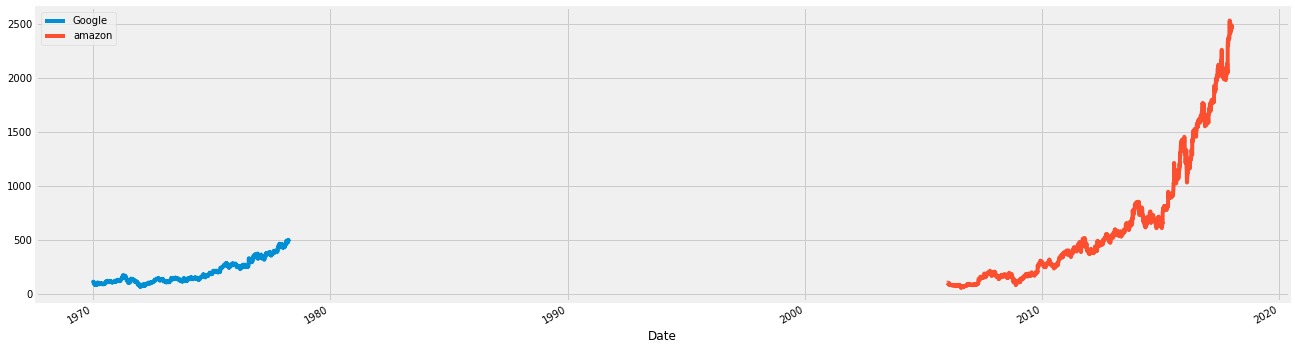

In [24]:
normalized_google = google.High.div(google.High.iloc[0]).mul(100)
normalized_amazont = amazon.High.div(amazon.High.iloc[0]).mul(100)
normalized_google.plot(figsize=(20,6))
normalized_amazont.plot(figsize=(20,6))
plt.legend(['Google','amazon'])
plt.show()

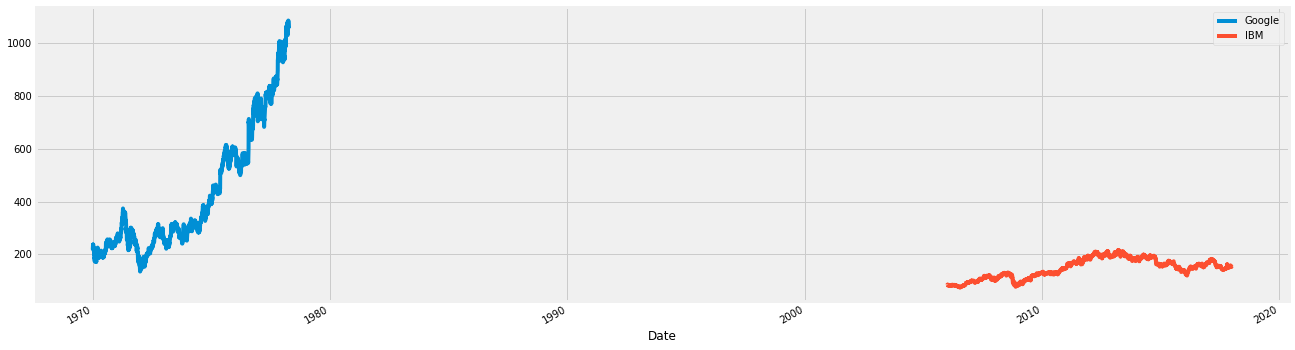

In [25]:
google.High.plot(figsize=(20,6))
IBM.High.plot(figsize=(20,6))
plt.legend(['Google','IBM'])
plt.show()

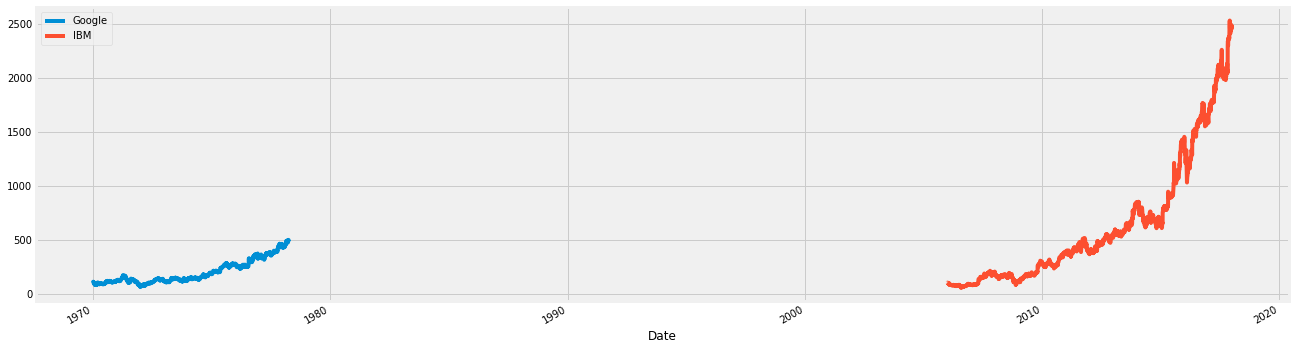

In [26]:
normalized_google = google.High.div(google.High.iloc[0]).mul(100)
normalized_IBM = IBM.High.div(IBM.High.iloc[0]).mul(100)
normalized_google.plot(figsize=(20,6))
normalized_amazont.plot(figsize=(20,6))
plt.legend(['Google','IBM'])
plt.show()

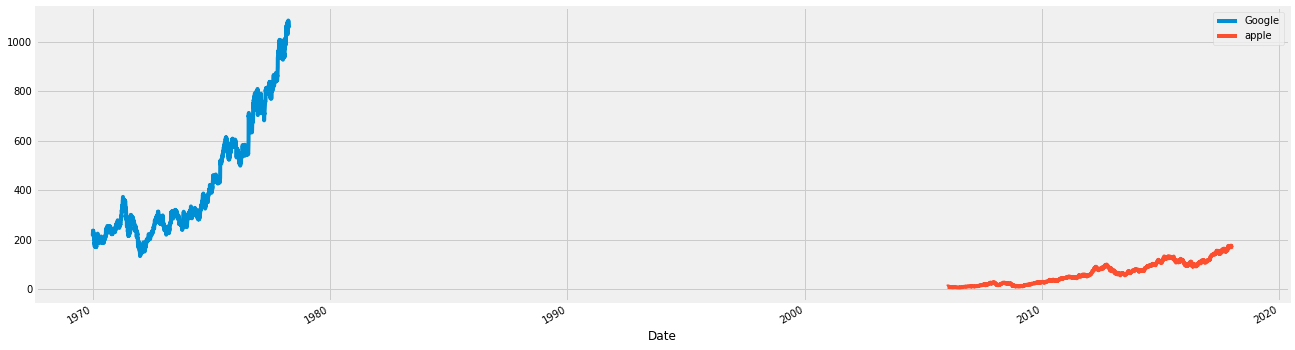

In [27]:
google.High.plot(figsize=(20,6))
apple.High.plot(figsize=(20,6))
plt.legend(['Google','apple'])
plt.show()

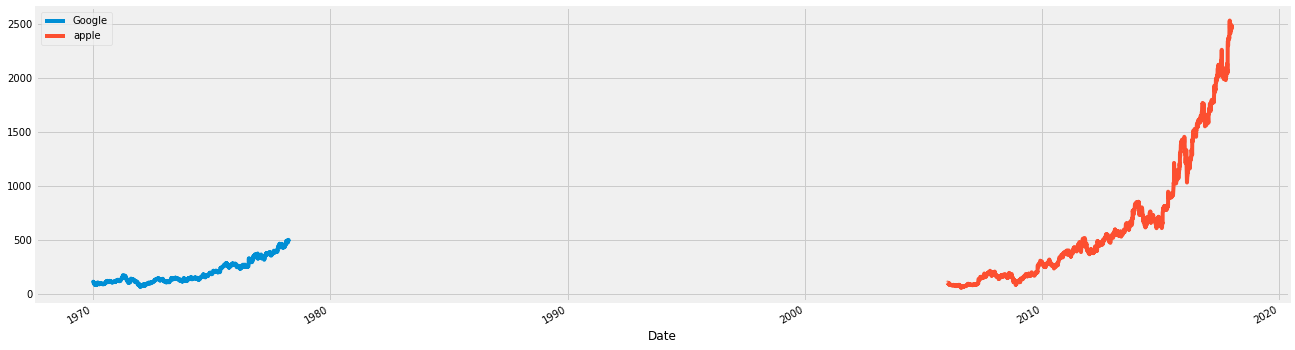

In [28]:
normalized_google = google.High.div(google.High.iloc[0]).mul(100)
normalized_apple = apple.High.div(apple.High.iloc[0]).mul(100)
normalized_google.plot(figsize=(20,6))
normalized_amazont.plot(figsize=(20,6))
plt.legend(['Google','apple'])
plt.show()

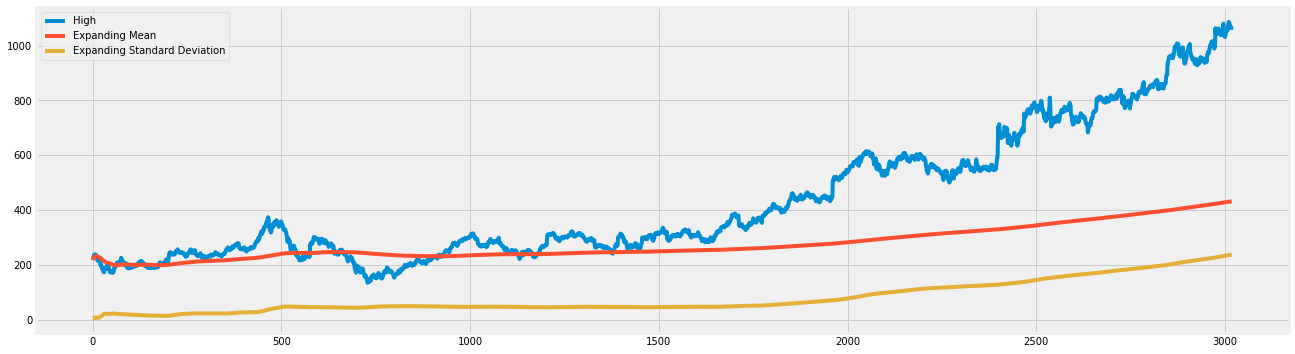

In [29]:
google_mean = google.High.expanding().mean()
google_std = google.High.expanding().std()
google.High.plot(figsize=(20,6))
google_mean.plot(figsize=(20,6))
google_std.plot(figsize=(20,6))
plt.legend(['High','Expanding Mean','Expanding Standard Deviation'])
plt.show()